In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [3]:
df_aggregated = pd.read_csv('/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/Home_Assignments/Minute_Media_home_assignment/aggregated_data_part_1.2.csv', index_col=0)

In [4]:
df_aggregated.head()

,time_range,device,browser,platform,platformVersion,event,num_distinct_sessions,total_revenue
day_of_week,,,,,,,,
4,afternoon,mobile,Instagram App,Android,14,displayImpression,149,3.10768
4,morning,mobile,iPhone,iOS,17.0,displayImpression,9,0.04171
4,afternoon,mobile,Pinterest,iOS,18.0.1,displayImpression,5,0.15825
6,afternoon,desktop,AVG Secure Browser,Windows,10,videoImpression,32,1.63983
4,night,mobile,MIUI Browser,Android,12,videoImpression,2,0.00874


# Task

Provide useful insights or patterns that could help **improve the monetization of our owned and operated sites**. Include visualizations to support your findings (e.g., trends, distributions, or relationships between variables that might affect revenue). Please make sure to include a brief narrative explaining the insights and recommendations based on your analysis. Your response should be presented in a document (PDF, Google Doc, etc). Make sure the document is clear, well-organized, and fully self-contained.

# My Approach

To understand how to improve the monetization of websites owned and operated by Minute Media, we want to check whether it's worth if to invest on specific segments of the data where existing revenue is already high. For each of the categorical variables within the dataframe, we look at the distribution of session and total revenue with the aim to uncover high-potential segments in terms of high traffic volume and high revenue.

In [5]:
# distributions by day of the week
df_aggregated_by_day = df_aggregated.groupby(['day_of_week']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_day['avg_revenue'] = df_aggregated_by_day['total_revenue']/df_aggregated_by_day['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3142008344.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3142008344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_revenue', ci=None, palette='Blues')


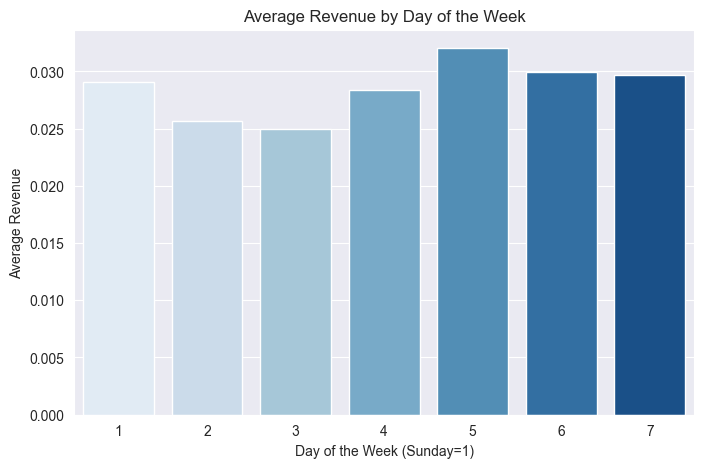

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by Day of the Week')
plt.xlabel('Day of the Week (Sunday=1)')
plt.ylabel('Average Revenue')
plt.show()


/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3928149619.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3928149619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_num_sessions', ci=None, palette='Blues')


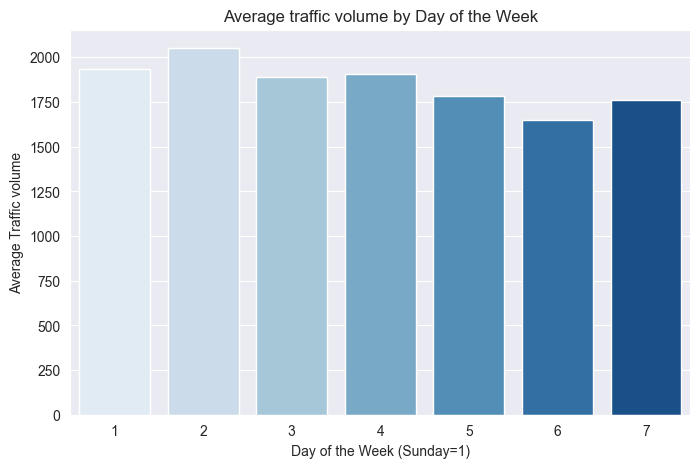

In [7]:
# traffic distribution by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_day, x='day_of_week', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by Day of the Week')
plt.xlabel('Day of the Week (Sunday=1)')
plt.ylabel('Average Traffic volume')
plt.show()

In [8]:
# distributions by time range

df_aggregated_by_time_range = df_aggregated.groupby(['time_range']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_time_range['avg_revenue'] = df_aggregated_by_time_range['total_revenue']/df_aggregated_by_time_range['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3133699264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3133699264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_revenue', ci=None, palette='Blues')


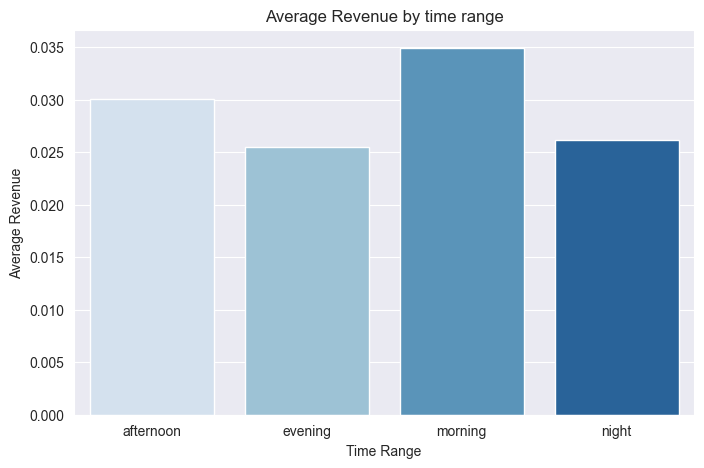

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by time range')
plt.xlabel('Time Range')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/917234730.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/917234730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_num_sessions', ci=None, palette='Blues')


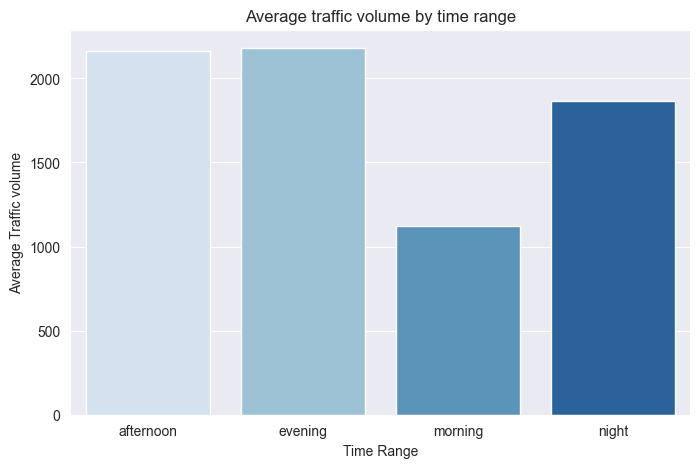

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_time_range, x='time_range', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by time range')
plt.xlabel('Time Range')
plt.ylabel('Average Traffic volume')
plt.show()

In [11]:
# distributions by device

df_aggregated_by_device = df_aggregated.groupby(['device']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_device['avg_revenue'] = df_aggregated_by_device['total_revenue']/df_aggregated_by_device['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/675310522.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_device, x='device', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/675310522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_device, x='device', y='avg_revenue', ci=None, palette='Blues')


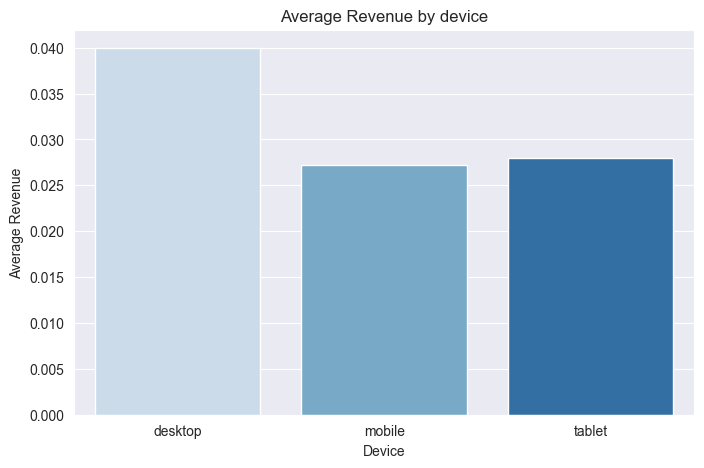

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_device, x='device', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by device')
plt.xlabel('Device')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1521949918.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_device, x='device', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1521949918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_device, x='device', y='avg_num_sessions', ci=None, palette='Blues')


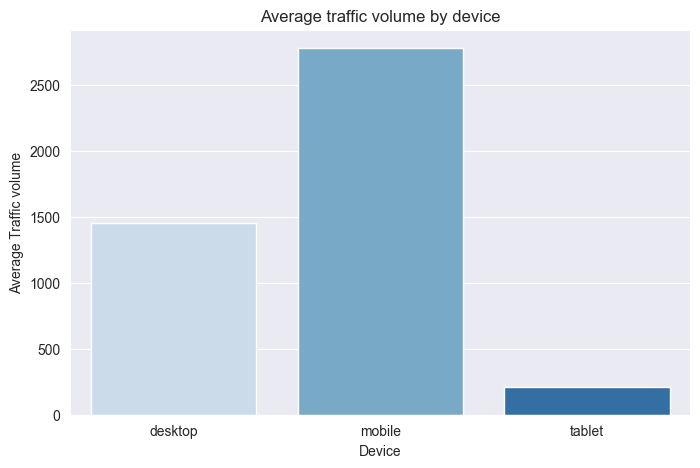

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_device, x='device', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by device')
plt.xlabel('Device')
plt.ylabel('Average Traffic volume')
plt.show()

In [14]:
df_aggregated.head()

,time_range,device,browser,platform,platformVersion,event,num_distinct_sessions,total_revenue
day_of_week,,,,,,,,
4,afternoon,mobile,Instagram App,Android,14,displayImpression,149,3.10768
4,morning,mobile,iPhone,iOS,17.0,displayImpression,9,0.04171
4,afternoon,mobile,Pinterest,iOS,18.0.1,displayImpression,5,0.15825
6,afternoon,desktop,AVG Secure Browser,Windows,10,videoImpression,32,1.63983
4,night,mobile,MIUI Browser,Android,12,videoImpression,2,0.00874


Now: browser, platform and platformVersion.
These features have respectively 157, 31 and 522 unique values, so to check whether there is a trend, I will first bin them into a lower amount of categories. I will bin together categories that are less frequent, so that for each category we have the top 3 most frequent values and an "other" category, so 4 total categories per aggregated feature. Once the categories are aggregated, I will perform an ANOVA to test if aggregated categories are statistically significant predictors of revenue.

In [15]:
def group_top_n_and_other(df, feature, session_column, top_n=3):
    feature_counts = df.groupby([feature], as_index=False)[session_column].sum().sort_values(by=session_column, ascending=False).reset_index(drop=True)
    feature_counts['aggregated_category'] = feature_counts[feature]
    feature_counts.loc[top_n:, 'aggregated_category'] = 'other'

    # Step 3: Map back to the original dataframe
    category_map = feature_counts.set_index(feature)['aggregated_category'].to_dict()
    df[f'aggregated_{feature}'] = df[feature].map(category_map)
    return df

# Apply the function for browser, platform, and platformVersion
df_aggregated = group_top_n_and_other(df_aggregated, 'browser', 'num_distinct_sessions', top_n=3)
df_aggregated = group_top_n_and_other(df_aggregated, 'platform', 'num_distinct_sessions', top_n=3)
df_aggregated = group_top_n_and_other(df_aggregated, 'platformVersion', 'num_distinct_sessions', top_n=3)


In [16]:
df_aggregated.head()

,time_range,device,browser,platform,platformVersion,event,num_distinct_sessions,total_revenue,aggregated_browser,aggregated_platform,aggregated_platformVersion
day_of_week,,,,,,,,,,,
4,afternoon,mobile,Instagram App,Android,14,displayImpression,149,3.10768,other,Android,other
4,morning,mobile,iPhone,iOS,17.0,displayImpression,9,0.04171,other,iOS,other
4,afternoon,mobile,Pinterest,iOS,18.0.1,displayImpression,5,0.15825,other,iOS,other
6,afternoon,desktop,AVG Secure Browser,Windows,10,videoImpression,32,1.63983,other,Windows,10
4,night,mobile,MIUI Browser,Android,12,videoImpression,2,0.00874,other,Android,other


In [17]:

# Perform ANOVA for each aggregated feature
for feature in ['browser', 'platform', 'platformVersion']:
    aggregated_feature = f'aggregated_{feature}'
    anova_result = stats.f_oneway(
        *[df_aggregated.loc[df_aggregated[aggregated_feature] == cat, 'total_revenue'] for cat in df_aggregated[aggregated_feature].unique()]
    )
    print(f"ANOVA p-value for {aggregated_feature} vs total_revenue: {anova_result.pvalue}")

ANOVA p-value for aggregated_browser vs total_revenue: 1.4313817543257518e-113
ANOVA p-value for aggregated_platform vs total_revenue: nan
ANOVA p-value for aggregated_platformVersion vs total_revenue: nan


/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [18]:
for feature in ['aggregated_browser', 'aggregated_platform', 'aggregated_platformVersion']:
    print(f"Group sizes for {feature}:")
    print(df_aggregated.groupby(feature)['total_revenue'].size())


Group sizes for aggregated_browser:
aggregated_browser
GSA               4779
Mobile Chrome     6590
Mobile Safari     9883
other            58297
Name: total_revenue, dtype: int64
Group sizes for aggregated_platform:
aggregated_platform
Android    16484
Windows     1912
iOS        53576
other       7546
Name: total_revenue, dtype: int64
Group sizes for aggregated_platformVersion:
aggregated_platformVersion
10         2447
17.6        954
17.6.1     1500
other     74605
Name: total_revenue, dtype: int64


In [19]:
for feature in ['aggregated_browser', 'aggregated_platform', 'aggregated_platformVersion']:
    aggregated_feature = feature
    valid_categories = [
        cat for cat in df_aggregated[aggregated_feature].unique()
        if df_aggregated.loc[df_aggregated[aggregated_feature] == cat, 'total_revenue'].count() > 1
    ]
    anova_result = stats.f_oneway(
        *[df_aggregated.loc[df_aggregated[aggregated_feature] == cat, 'total_revenue'] for cat in valid_categories]
    )
    print(f"ANOVA p-value for {aggregated_feature} vs total_revenue: {anova_result.pvalue}")


ANOVA p-value for aggregated_browser vs total_revenue: 1.4313817543257518e-113
ANOVA p-value for aggregated_platform vs total_revenue: 5.323248883797415e-38
ANOVA p-value for aggregated_platformVersion vs total_revenue: 0.0


In [20]:
for feature in ['aggregated_browser', 'aggregated_platform', 'aggregated_platformVersion']:
    print(f"Variance in groups for {feature}:")
    print(df_aggregated.groupby(feature)['total_revenue'].var())


Variance in groups for aggregated_browser:
aggregated_browser
GSA              3.788704e+05
Mobile Chrome    1.177137e+07
Mobile Safari    2.774188e+05
other            4.041428e+04
Name: total_revenue, dtype: float64
Variance in groups for aggregated_platform:
aggregated_platform
Android    4.760647e+06
Windows    6.380431e+05
iOS        9.167219e+04
other      3.184361e+04
Name: total_revenue, dtype: float64
Variance in groups for aggregated_platformVersion:
aggregated_platformVersion
10        3.171434e+07
17.6      1.825713e+06
17.6.1    1.772887e+06
other     7.135739e+03
Name: total_revenue, dtype: float64


In [21]:
from scipy.stats import kruskal

for feature in ['aggregated_browser', 'aggregated_platform', 'aggregated_platformVersion']:
    aggregated_feature = feature
    valid_groups = [
        df_aggregated.loc[df_aggregated[aggregated_feature] == cat, 'total_revenue']
        for cat in df_aggregated[aggregated_feature].unique()
        if df_aggregated.loc[df_aggregated[aggregated_feature] == cat, 'total_revenue'].count() > 1
    ]
    if len(valid_groups) > 1:
        kruskal_result = kruskal(*valid_groups)
        print(f"Kruskal-Wallis p-value for {aggregated_feature} vs total_revenue: {kruskal_result.pvalue}")
    else:
        print(f"Not enough valid groups for {aggregated_feature}")


Kruskal-Wallis p-value for aggregated_browser vs total_revenue: 0.0
Kruskal-Wallis p-value for aggregated_platform vs total_revenue: 3.272824791255293e-40
Kruskal-Wallis p-value for aggregated_platformVersion vs total_revenue: 7.691431066516337e-188


All three features—aggregated_browser, aggregated_platform, and aggregated_platformVersion—show highly significant differences in total_revenue across their respective groups.
This confirms that these features are likely predictive of revenue.

- Browser: Focus on optimizing ad delivery for high-performing browsers like Mobile Chrome and Mobile Safari.
- Platform: Revenue differences across iOS, Android, and Windows suggest platform-specific strategies may be beneficial.
- PlatformVersion: Specific platform versions (e.g., 10, 17.6) may be associated with significantly different revenue levels. This could guide platform version-specific optimizations.

In [22]:
# distributions by browser, platform, platformVersion (aggregated)

df_aggregated_by_aggregated_browser = df_aggregated.groupby(['aggregated_browser']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_aggregated_browser['avg_revenue'] = df_aggregated_by_aggregated_browser['total_revenue']/df_aggregated_by_aggregated_browser['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1624211426.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1624211426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_revenue', ci=None, palette='Blues')


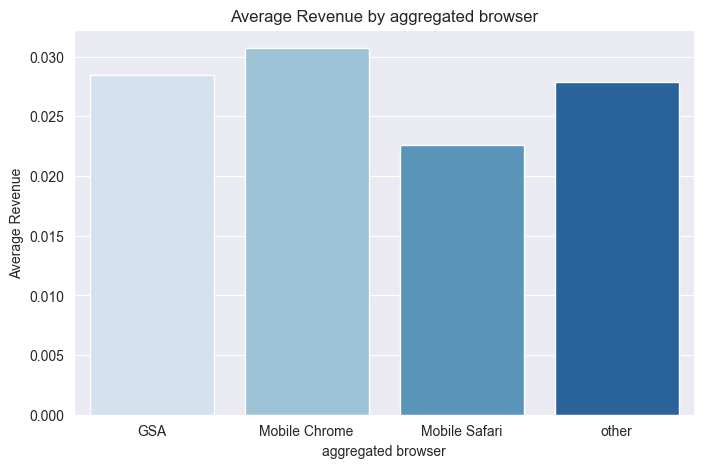

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by aggregated browser')
plt.xlabel('aggregated browser')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/4008132550.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/4008132550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_num_sessions', ci=None, palette='Blues')


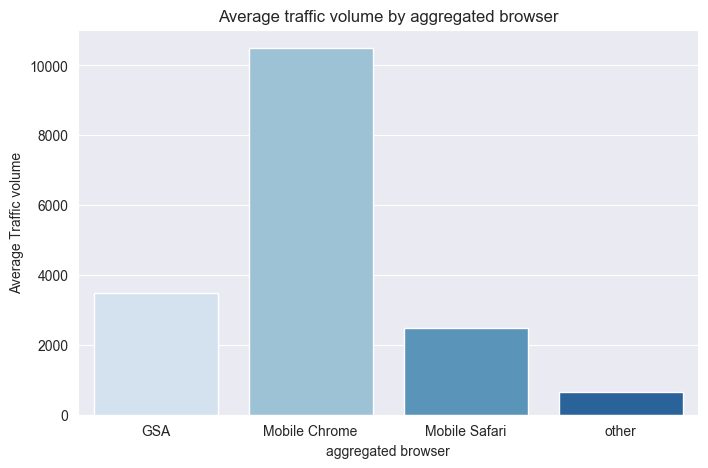

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_browser, x='aggregated_browser', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by aggregated browser')
plt.xlabel('aggregated browser')
plt.ylabel('Average Traffic volume')
plt.show()

In [25]:
# distributions by browser, platform, platformVersion (aggregated)

df_aggregated_by_aggregated_platform = df_aggregated.groupby(['aggregated_platform']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_aggregated_platform['avg_revenue'] = df_aggregated_by_aggregated_platform['total_revenue']/df_aggregated_by_aggregated_platform['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/2842975176.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/2842975176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_revenue', ci=None, palette='Blues')


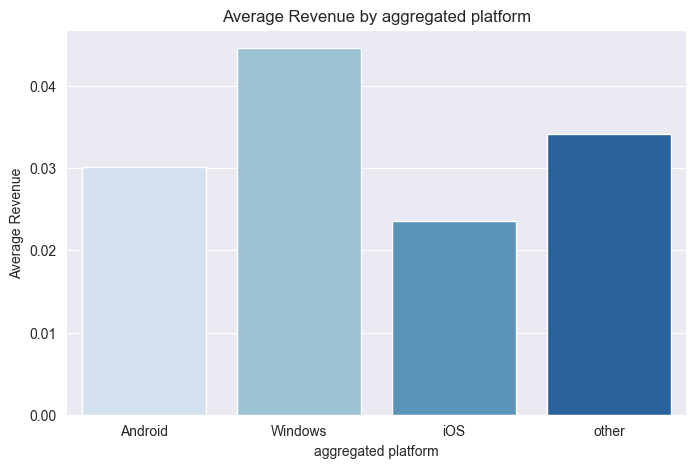

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by aggregated platform')
plt.xlabel('aggregated platform')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1493575419.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1493575419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_num_sessions', ci=None, palette='Blues')


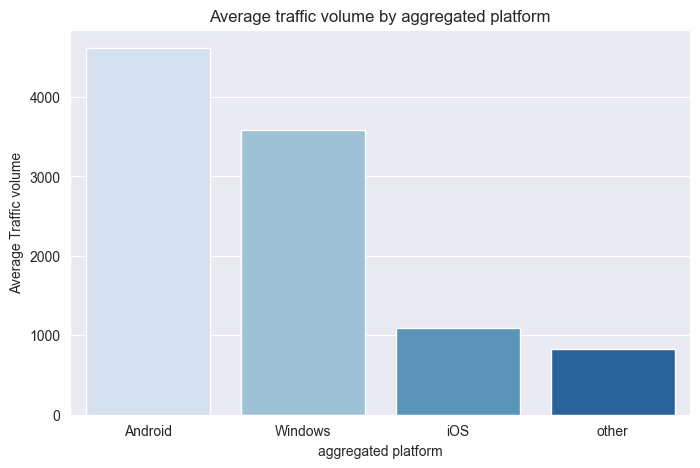

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_platform, x='aggregated_platform', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by aggregated platform')
plt.xlabel('aggregated platform')
plt.ylabel('Average Traffic volume')
plt.show()

In [28]:
# distributions by browser, platform, platformVersion (aggregated)

df_aggregated_by_aggregated_platformV = df_aggregated.groupby(['aggregated_platformVersion']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_aggregated_platformV['avg_revenue'] = df_aggregated_by_aggregated_platformV['total_revenue']/df_aggregated_by_aggregated_platformV['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/451987662.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/451987662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_revenue', ci=None, palette='Blues')


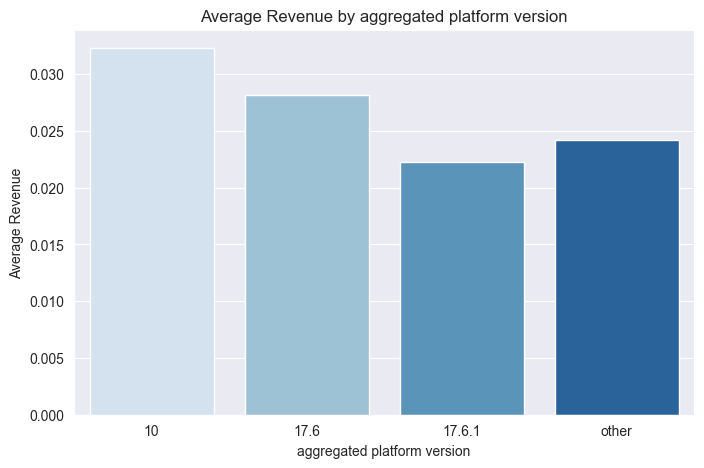

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by aggregated platform version')
plt.xlabel('aggregated platform version')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3109848136.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/3109848136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_num_sessions', ci=None, palette='Blues')


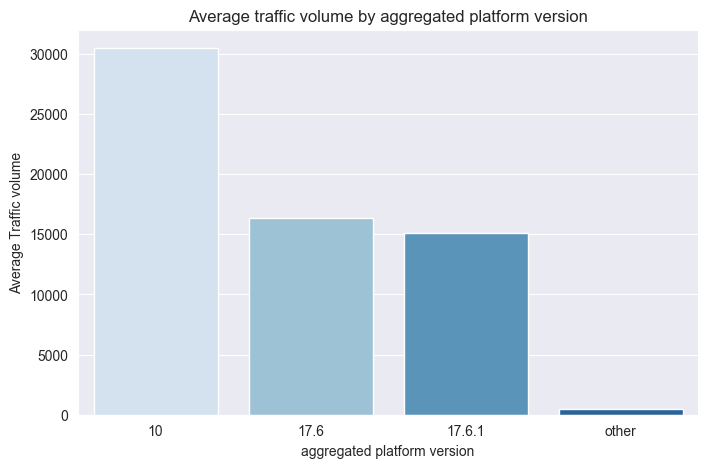

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_platformV, x='aggregated_platformVersion', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by aggregated platform version')
plt.xlabel('aggregated platform version')
plt.ylabel('Average Traffic volume')
plt.show()

In [31]:
# distributions by event

df_aggregated_by_aggregated_event = df_aggregated.groupby(['event']).agg(total_revenue=('total_revenue','sum'), total_sessions=('num_distinct_sessions','sum'), avg_num_sessions=('num_distinct_sessions','mean')).reset_index()
df_aggregated_by_aggregated_event['avg_revenue'] = df_aggregated_by_aggregated_event['total_revenue']/df_aggregated_by_aggregated_event['total_sessions']

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/2611904030.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_revenue', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/2611904030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_revenue', ci=None, palette='Blues')


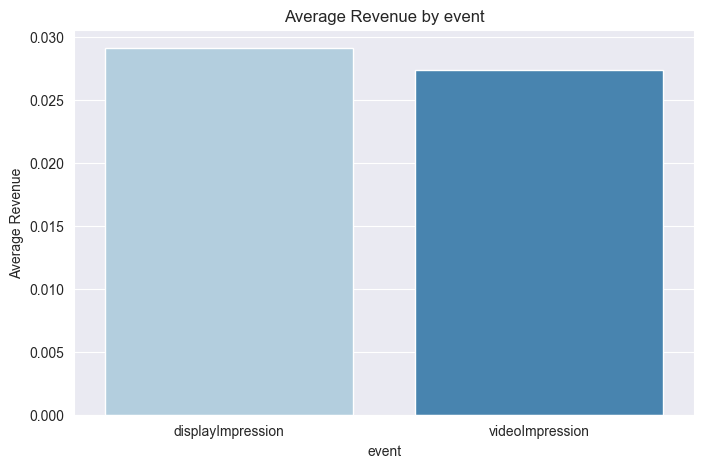

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_revenue', ci=None, palette='Blues')
plt.title('Average Revenue by event')
plt.xlabel('event')
plt.ylabel('Average Revenue')
plt.show()

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1984642575.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_num_sessions', ci=None, palette='Blues')
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_88984/1984642575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_num_sessions', ci=None, palette='Blues')


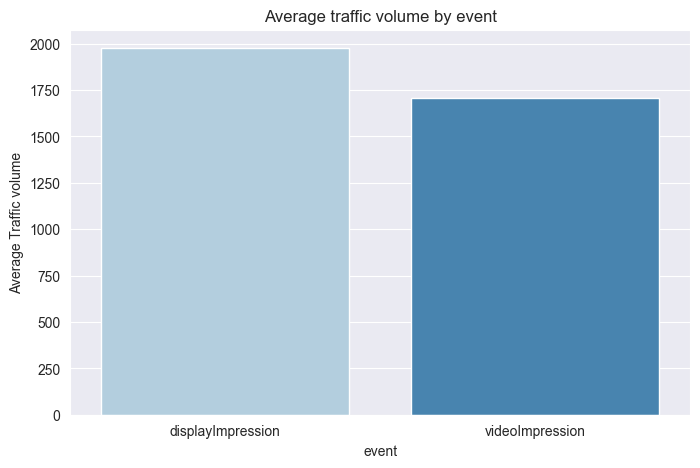

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_aggregated_by_aggregated_event, x='event', y='avg_num_sessions', ci=None, palette='Blues')
plt.title('Average traffic volume by event')
plt.xlabel('event')
plt.ylabel('Average Traffic volume')
plt.show()

The reason why we are getting 2 event types only is that for all the other event types the revenue is null.